<a href="https://colab.research.google.com/github/ctclumak/Tensorflow-2-and-Keras-Deep-Learning/blob/master/Analyze_the_eating_habits_between_countries_in_UK_with_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("UK_foods.csv",index_col="Unnamed: 0")

In [3]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


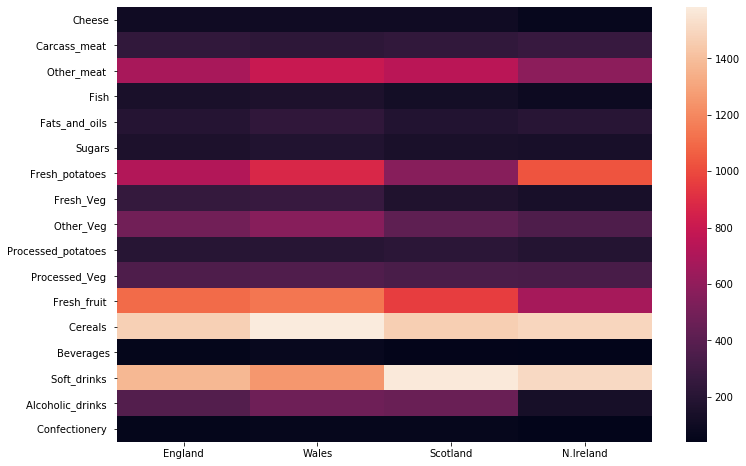

In [5]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df)

**Run the imports necessary to build an autoencoder, to reduce the dimensions from 17 - > 2 and see if any countries stand out as very different**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Create an encoder, in the solutions we built one that went 17 -> 8->4->2**

In [7]:
encoder = Sequential()
encoder.add(Dense(8,activation="relu", input_shape=[17]))
encoder.add(Dense(4,activation="relu"))
encoder.add(Dense(2,activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**Create an decoder, in the solutions we built one that went 2 -> 4->8->17**

In [0]:
decoder = Sequential()
decoder.add(Dense(units=4, activation="relu", input_shape =[2]))
decoder.add(Dense(units=8, activation="relu"))
decoder.add(Dense(units=17, activation="relu"))


**Combine the encoder and the decoder to be an autoencoder and compile the model.**

In [0]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss = "mse", optimizer = SGD(lr=1.5))

**Create a MinMaxScaler to scale the data, make sure to transpose the data, since we have 17 feature columns and only 4 rows**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df.transpose().values)

In [11]:
scaler_df.shape

(4, 17)

**Fit the autoencoder to the scaled data for 15 epochs**

In [12]:
autoencoder.fit(scaler_df,scaler_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 38ms/sample - loss: 0.4261
Epoch 2/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.3900
Epoch 3/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.3342
Epoch 4/15
4/4 [==============================] - 0s 704us/sample - loss: 0.3014
Epoch 5/15
4/4 [==============================] - 0s 427us/sample - loss: 0.2855
Epoch 6/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2794
Epoch 7/15
4/4 [==============================] - 0s 440us/sample - loss: 0.2764
Epoch 8/15
4/4 [==============================] - 0s 526us/sample - loss: 0.2750
Epoch 9/15
4/4 [==============================] - 0s 479us/sample - loss: 0.2740
Epoch 10/15
4/4 [==============================] - 0s 523us/sample - loss: 0.2734
Epoch 11/15
4/4 [==============================] - 0s 553us/sample - loss: 0.2725
Epoch 12/15
4/4 [==============================] - 0s 638us/sample - loss: 0.2731
Epoch 13/15
4

**Run the scaled data through only the encoder and prodict the reduced dimensionality output**

In [0]:
encoder_2dim = encoder.predict(scaler_df)

In [14]:
encoder_2dim

array([[0.50078106, 0.3939588 ],
       [0.7086657 , 0.6582061 ],
       [0.20771603, 0.06274346],
       [0.01723556, 0.        ]], dtype=float32)

**Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly**

In [15]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [0]:
results = pd.DataFrame(data = encoder_2dim,
                       index=df.transpose().index,
                       columns = ["C1", "C2"])

In [0]:
results=results.reset_index()

In [18]:
results

,index,C1,C2
0,England,0.500781,0.393959
1,Wales,0.708666,0.658206
2,Scotland,0.207716,0.062743
3,N.Ireland,0.017236,0.000000


**Plot the results in a scatterplot, labeled by their respective countries**

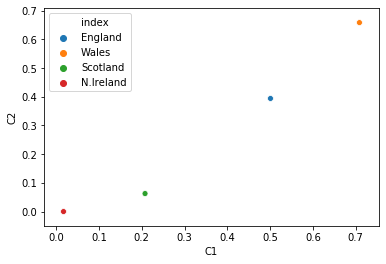

In [19]:
sns.scatterplot(x="C1", y="C2",data = results,hue="index")